<a href="https://colab.research.google.com/github/poojaayadav/-diabetes_predication_app/blob/main/NN_on_Binary_classification_on_telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns='customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
162.3       1
5450.7      1
653.15      1
7611.85     1
342.4       1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [8]:
df['TotalCharges'].isnull().sum()

11

In [9]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [10]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df_cat=df.select_dtypes("object")

In [13]:
le = LabelEncoder()
for col in df_cat :
  df_cat[col] = le.fit_transform(df_cat[col])

In [14]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [15]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [16]:
df_num = df[['tenure','MonthlyCharges','TotalCharges']]

In [17]:
df_new = pd.concat([df_num,df_cat, df['SeniorCitizen']], axis=1)
df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


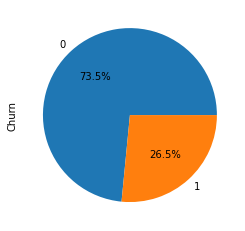

In [18]:
df_new['Churn'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [19]:
x = df_new.drop("Churn", axis=1)
y = df_new['Churn']

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler()

In [23]:
xsample, ysample = ros.fit_sample(xtrain, ytrain)
pd.Series(ysample).value_counts()

1    3589
0    3589
dtype: int64

In [24]:
ss = StandardScaler()
xtrain = ss.fit_transform(xsample)
xtest = ss.fit_transform(xtest)

In [25]:
xtrain.shape

(7178, 19)

In [26]:
model = Sequential()
model.add(Dense(64, input_dim=19,activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [28]:
trained_model=model.fit(xtrain, ysample, epochs=35)

Epoch 1/35
225/225 [==============================] - 1s 1ms/step - loss: 0.5385
Epoch 2/35
225/225 [==============================] - 0s 1ms/step - loss: 0.5096
Epoch 3/35
225/225 [==============================] - 0s 1ms/step - loss: 0.5046
Epoch 4/35
225/225 [==============================] - 0s 1ms/step - loss: 0.5026
Epoch 5/35
225/225 [==============================] - 0s 1ms/step - loss: 0.5011
Epoch 6/35
225/225 [==============================] - 0s 1ms/step - loss: 0.4999
Epoch 7/35
225/225 [==============================] - 0s 1ms/step - loss: 0.4989
Epoch 8/35
225/225 [==============================] - 0s 2ms/step - loss: 0.4981
Epoch 9/35
225/225 [==============================] - 0s 1ms/step - loss: 0.4974
Epoch 10/35
225/225 [==============================] - 0s 1ms/step - loss: 0.4966
Epoch 11/35
225/225 [==============================] - 0s 1ms/step - loss: 0.4958
Epoch 12/35
225/225 [==============================] - 0s 1ms/step - loss: 0.4952
Epoch 13/35
225/225 [====

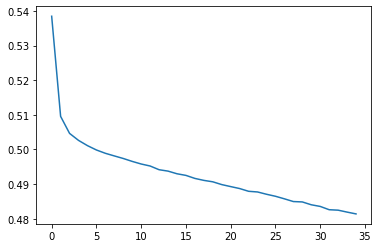

In [29]:
plt.plot(trained_model.history['loss'])

In [30]:
ypred=model.predict(xtest)

In [31]:
ypred=np.where(ypred>=0.5,1,0)

In [32]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1585
           1       0.45      0.91      0.60       528

    accuracy                           0.70      2113
   macro avg       0.70      0.77      0.68      2113
weighted avg       0.83      0.70      0.72      2113

